# **Gold** **Price** **Prediction**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from sklearn import metrics

In [2]:
dataset = pd.read_csv(r"/content/gld_price_data.csv")
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
dataset.shape

(2290, 6)

In [4]:
dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [5]:
dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
dataset.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

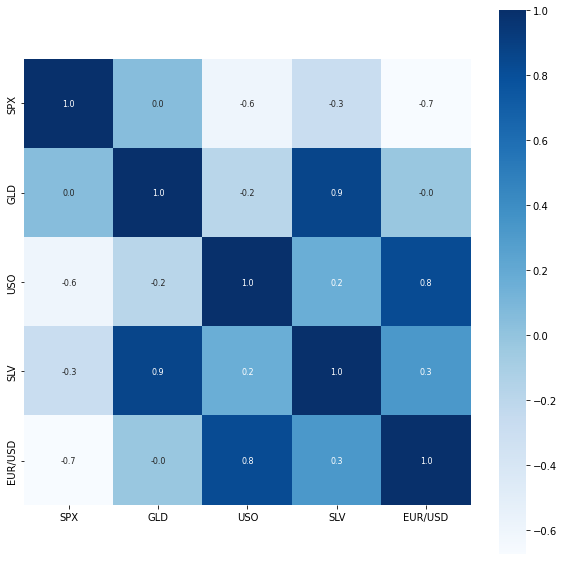

In [7]:
correlation = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True,square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


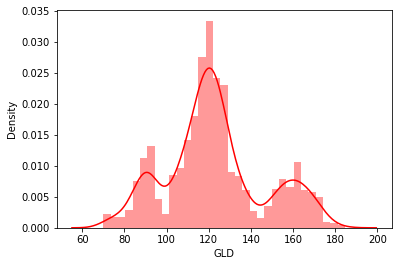

In [8]:
sns.distplot(dataset['GLD'], color='Red')

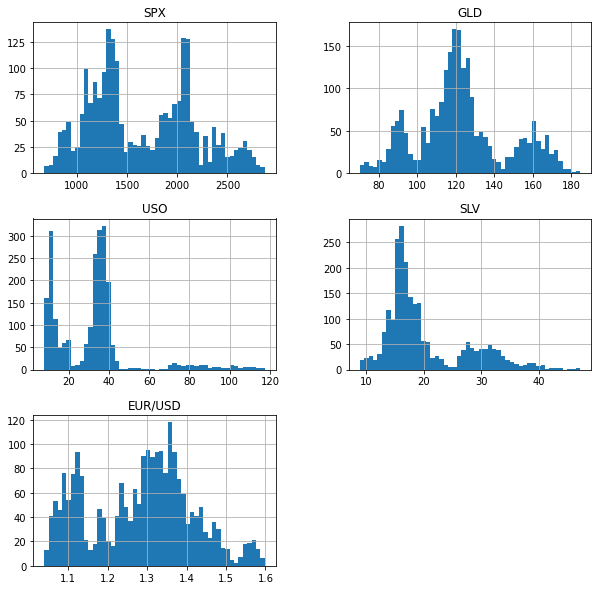

In [9]:
dataset.hist(figsize=(10,10),bins=50)
plt.show()

In [10]:
x = dataset.drop(['Date','GLD'],axis=1)
y = dataset['GLD']

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)


In [12]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)


In [13]:
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [14]:
y_pred = regressor.predict(x_test)

In [15]:
error_score = metrics.r2_score(y_test, y_pred)
print("R squared error : ", error_score)
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))

R squared error :  0.9874416877430625
MAE :   1.382048407183407


Text(0.5, 1.0, 'Actual vs Predicted Price')

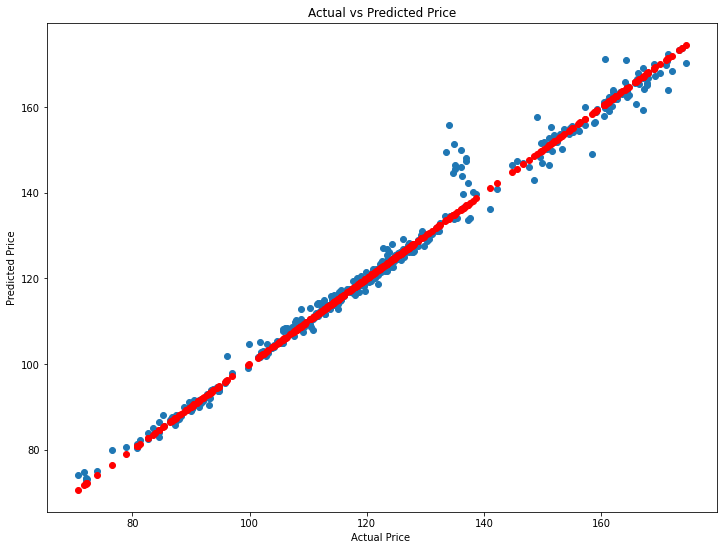

In [16]:
fig=plt.figure(figsize=(12,9))
plt.scatter(y=y_pred,x=y_test)
plt.scatter(y_test,y_test,color='r',linewidths=1)
plt.xlabel('Actual Price ')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')

Test Case

In [20]:
input_data = x[10:11]
input_data_arr= np.asarray(input_data)
input_data_arr_reshape = input_data_arr.reshape(1, -1)
print(input_data_arr_reshape)

[[1373.199951   71.849998   15.654       1.466405]]


In [21]:
prediction = regressor.predict(input_data_arr_reshape)
print(prediction)

[86.9220982]


In [22]:
print(y[10:11])

10    86.699997
Name: GLD, dtype: float64
